In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import xml.etree.ElementTree as ET


In [141]:
#making a cmap for the visualization
palette_tabac = ["#4e342e", "#5d4037", "#6d4c41", "#8d6e63", "#a1887f", "#d7ccc8"]

On commence par visualiser le dataset issue de Kaggle

In [2]:
#Loading the pictures and paths of the tif files
picture_list = []
file_list = []
for file in glob.glob("./../data/raw/ImageAndXML_Data/*.tif"):
    picture_list.append(file)
    file_list.append(file.split('/')[-1])

print(len(picture_list))

520


On visualise les propriétés des images

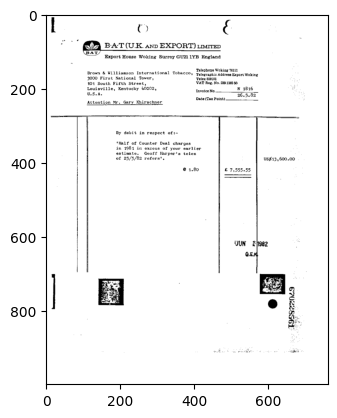

ImageAndXML_Data\0000223278.tif


In [4]:
#Showing the first picture
img = Image.open(picture_list[0])
plt.imshow(img, cmap='gray')
plt.show()

print(file_list[0])

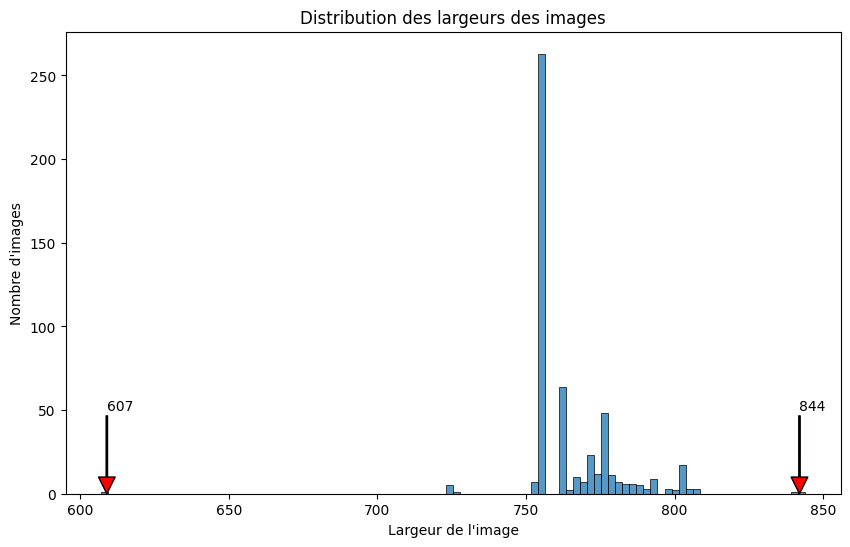

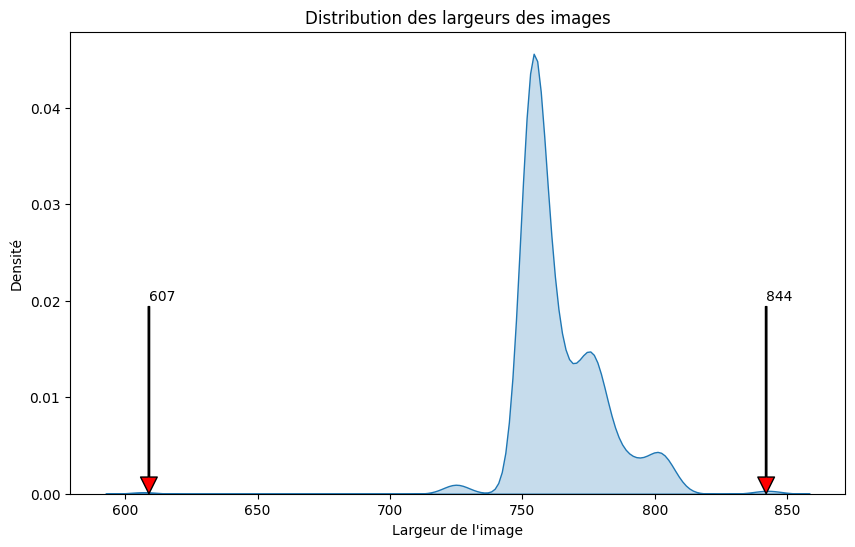

In [12]:
#copying the first dimension of each picture into an array. The second dimension is always 1000.
dim_list = []
for picture in picture_list:
    img = Image.open(picture)
    dim_list.append(img.size[0])

#ploting the dimensions
plt.figure(figsize=(10, 6))
plt.xlabel('Largeur de l\'image')
plt.ylabel('Nombre d\'images')
sns.histplot(dim_list, bins=100)
plt.annotate(min(dim_list), xy=(min(dim_list)+2, 0), xytext=(min(dim_list)+2, 50), arrowprops=dict(facecolor='red', width=1))
plt.annotate(max(dim_list), xy=(max(dim_list)-2, 0), xytext=(max(dim_list)-2, 50), arrowprops=dict(facecolor='red', width=1))
plt.title('Distribution des largeurs des images')
plt.show()

#ploting the dimensions as a kde
plt.figure(figsize=(10, 6))
plt.xlabel('Largeur de l\'image')
plt.ylabel('Densité')
sns.kdeplot(dim_list, fill=True)
plt.annotate(min(dim_list), xy=(min(dim_list)+2, 0), xytext=(min(dim_list)+2, 0.02), arrowprops=dict(facecolor='red', width=1))
plt.annotate(max(dim_list), xy=(max(dim_list)-2, 0), xytext=(max(dim_list)-2, 0.02), arrowprops=dict(facecolor='red', width=1))
plt.title('Distribution des largeurs des images')
plt.show()


In [41]:
#get the percent of black pixels in the images
def get_black_percent(picture):
    img = Image.open(picture)
    img_array = img.load()
    black = 0
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            if img_array[i,j] == 0:
                black += 1
    return (picture, black/(img.size[0]*img.size[1]))

black_percent_list = []
for picture in picture_list:
    black_percent_list.append(get_black_percent(picture))

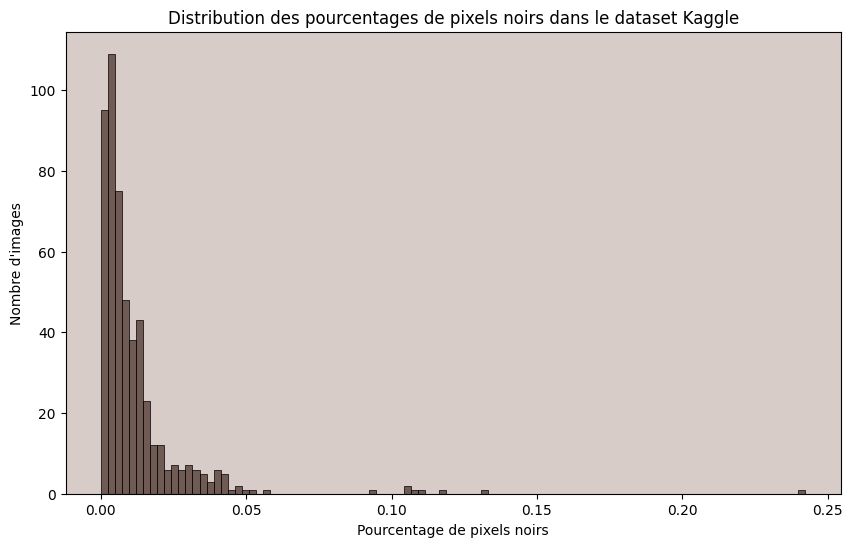

In [49]:
#ploting the black percent of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Pourcentage de pixels noirs')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot([x[1] for x in black_percent_list], bins=100)
plt.title('Distribution des pourcentages de pixels noirs dans le dataset Kaggle')
plt.show()

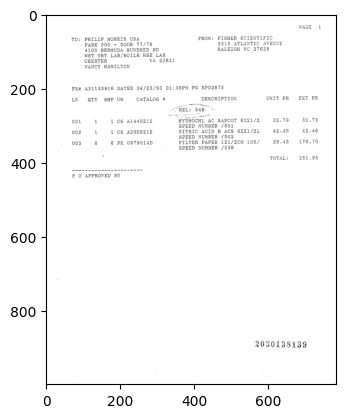

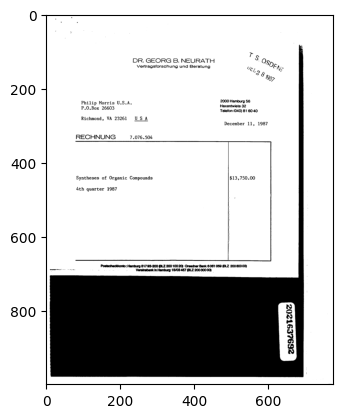

In [50]:
#show the picture with least and most black pixels
min_black = min(black_percent_list, key=lambda x: x[1])
max_black = max(black_percent_list, key=lambda x: x[1])

img = Image.open(min_black[0])
plt.imshow(img, cmap='gray')
plt.show()

img = Image.open(max_black[0])
plt.imshow(img, cmap='gray')
plt.show()

In [13]:
#get the global orientation of the pictures
def get_orientation(picture):
    image = cv2.imread(picture, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    angles = []
    if lines is not None:
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta) - 90
            angles.append(angle)
        angle_moyen = np.mean(angles)
        return angle_moyen
    else:
        return None

orientation_list = []
for picture in picture_list:
    orientation_list.append(get_orientation(picture))

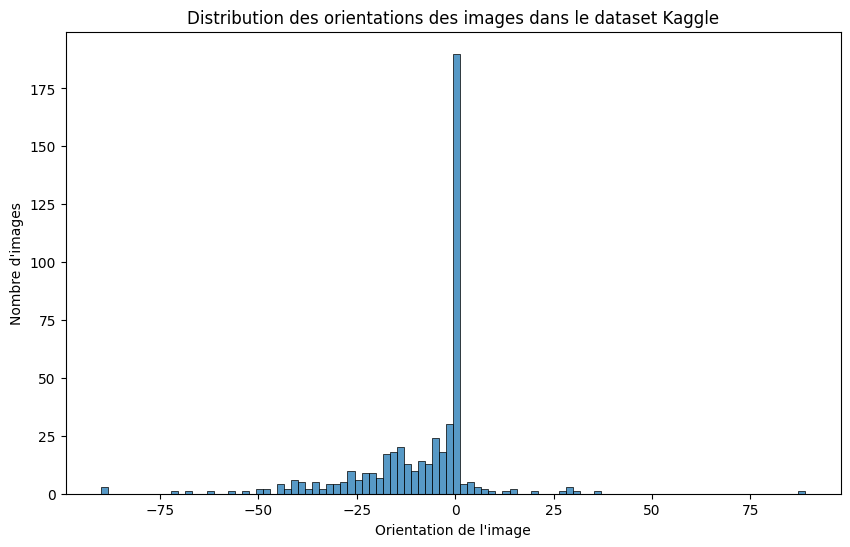

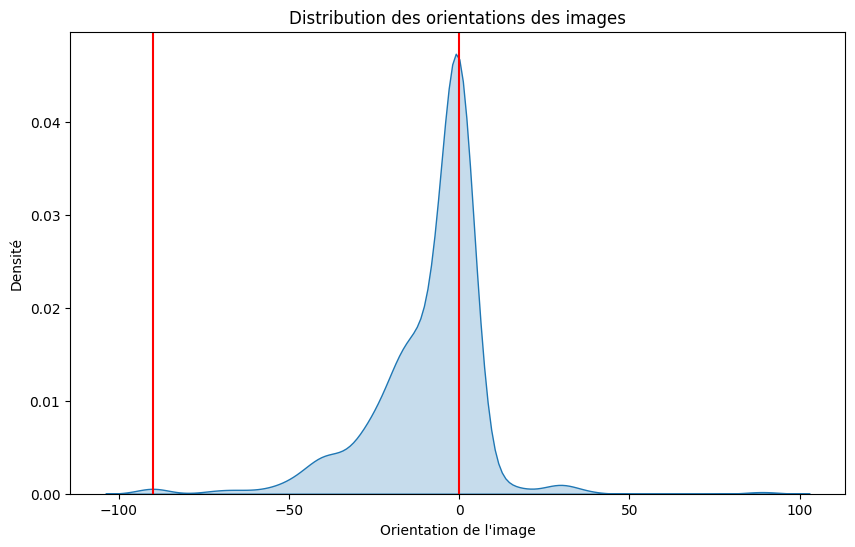

In [16]:
#ploting the orientation of the images
plt.figure(figsize=(10, 6))
plt.xlabel('Orientation de l\'image')
plt.ylabel('Nombre d\'images')
sns.histplot(orientation_list, bins=100)
plt.title('Distribution des orientations des images dans le dataset Kaggle')
plt.show()

#same plot but with a kde
plt.figure(figsize=(10, 6))
plt.xlabel('Orientation de l\'image')
plt.ylabel('Densité')
sns.kdeplot(orientation_list, fill=True)
plt.axvline(x=-90, color='red')
plt.axvline(x=0, color='red')
plt.title('Distribution des orientations des images')
plt.show()

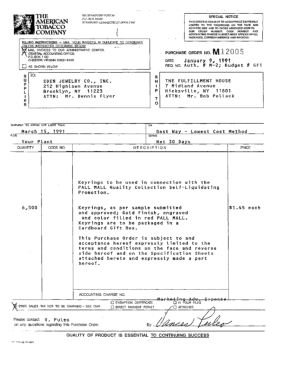

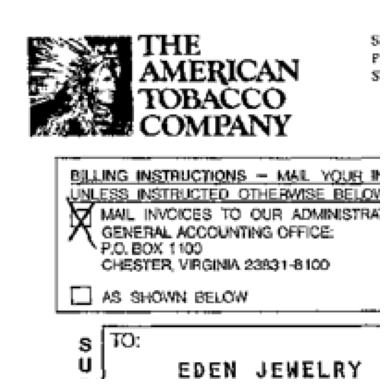

In [27]:
#show the first picture and show a zoom of the first picture at x=0 and y=0 for a dimension of 200x200 pixels
img = Image.open(picture_list[5])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = Image.open(picture_list[5])
img = img.crop((0, 0, 200, 200))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()



In [28]:
#get the average size of the letters in the pictures
def get_letter_size(picture):
    image = cv2.imread(picture, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    heights = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        heights.append(h)

    average_height = np.mean(heights)
    return average_height

letter_size_list = []
for picture in picture_list:
    letter_size_list.append(get_letter_size(picture))

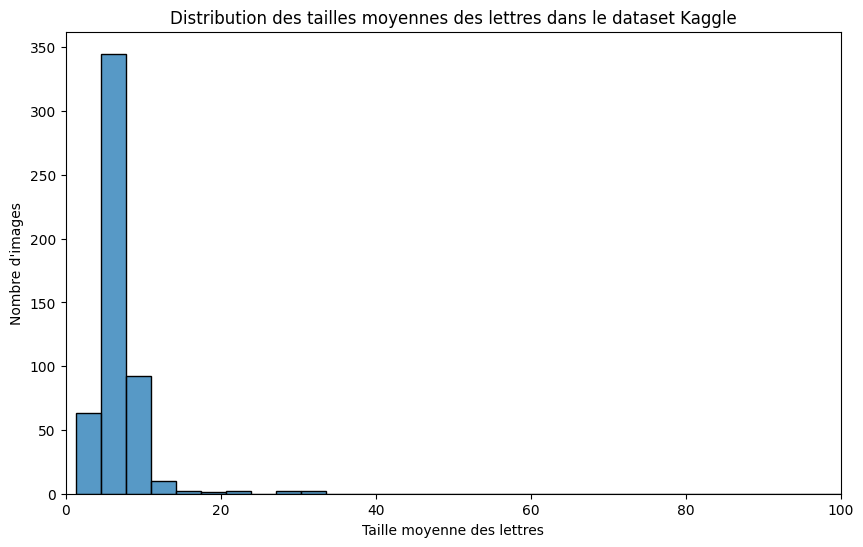

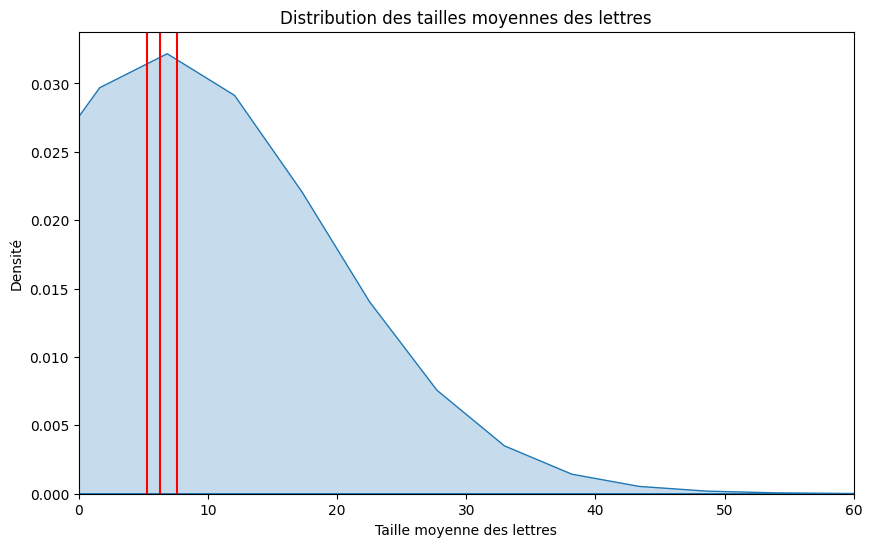

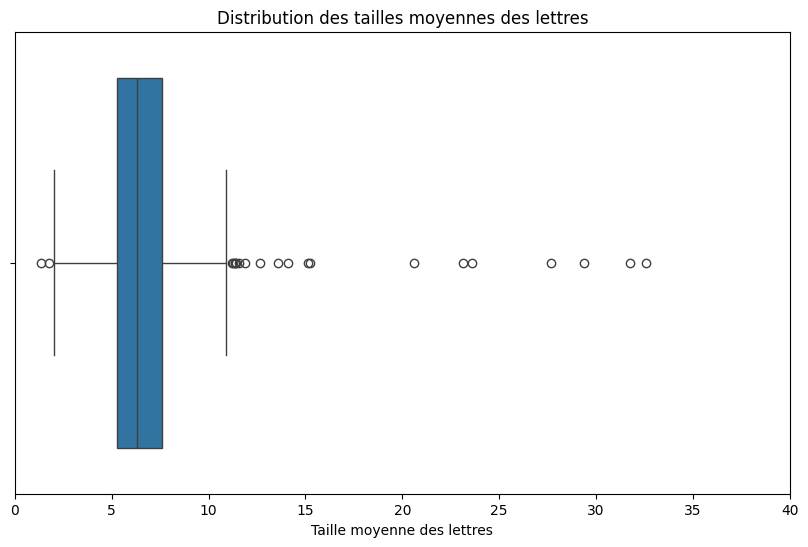

In [50]:
#ploting the letter size of the images
plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.xlabel('Taille moyenne des lettres')
plt.ylabel('Nombre d\'images')
sns.histplot(letter_size_list, bins=300)
plt.title('Distribution des tailles moyennes des lettres dans le dataset Kaggle')
plt.show()

#ploting the letter size of the images with a kde
plt.figure(figsize=(10, 6))
plt.xlim(0, 60)
plt.xlabel('Taille moyenne des lettres')
plt.ylabel('Densité')
sns.kdeplot(letter_size_list, fill=True)
#show the first quartile
plt.axvline(x=np.percentile(letter_size_list, 25), color='red')
#show the median
plt.axvline(x=np.median(letter_size_list), color='red')
#show the third quartile
plt.axvline(x=np.percentile(letter_size_list, 75), color='red')
plt.title('Distribution des tailles moyennes des lettres')
plt.show()

#ploting as a horizontal boxplot from 0 to 40
plt.figure(figsize=(10, 6))
plt.xlim(0, 40)
plt.xlabel('Taille moyenne des lettres')
sns.boxplot(letter_size_list, orient='h')
plt.title('Distribution des tailles moyennes des lettres')
plt.show()

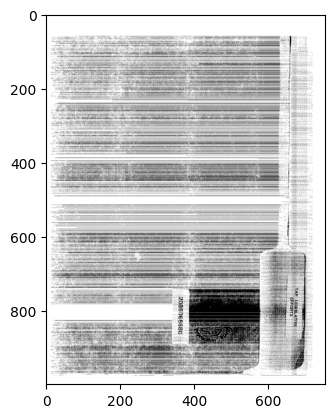

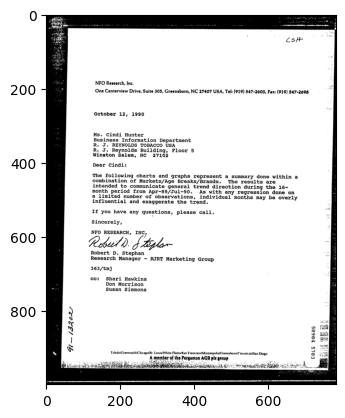

In [128]:
#show the picture with smallest and biggest letters
min_letter = min(letter_size_list)
max_letter = max(letter_size_list)

img = Image.open(picture_list[letter_size_list.index(min_letter)])
plt.imshow(img, cmap='gray')
plt.show()

img = Image.open(picture_list[letter_size_list.index(max_letter)])
plt.imshow(img, cmap='gray')
plt.show()

On visualise les propriétés du texte associé

In [60]:
#Loading the xml files text
def get_ocr_text(filepath):
    text_dict = {}
    for file in glob.glob(f"{filepath}/*_ocr.xml"):
        current_text = ""
        tree = ET.parse(file)
        root = tree.getroot()
        for page in root:
            for TextRegion in page:
                for TextLine in TextRegion:
                    for Word in TextLine:
                        for TextEquiv in Word:
                            for Unicode in TextEquiv:
                                current_text += Unicode.text + " "
        text_dict[file] = current_text
    return text_dict

text_dict = get_ocr_text("./../data/raw/ImageAndXML_Data")

In [63]:
#Show the first text of the list
print(list(text_dict.values())[0])

r> B AT (U.K. and EXPORT) limited Export House Woking Surrey GU211YB England Brown & Williamson International Tobacco, 3000 First National Tower, 101 South Fifth Street, Louisville, Kentucky 40202, U.S.A. Attention Mr. Gory Xhirschncr Telephone Wokin* 76111 Telaeriphic Addreee Export Wokir.* Telex &M101 VAT Reg. No. 239136S to Invoice No.. N I8l6 Date (Tax Point). 26.5.02 By debit in respect of:- 'llalf of Counter Deal charges in 1981 in excess of your earlier estimate. Geoff Harper's telex of 25/5/82 refers*. @ 1.80 US#13,600.00 


In [65]:
#count the number of words in each texts
word_dict = {}
for file, text in text_dict.items():
    word_dict[file] = len(text.split())

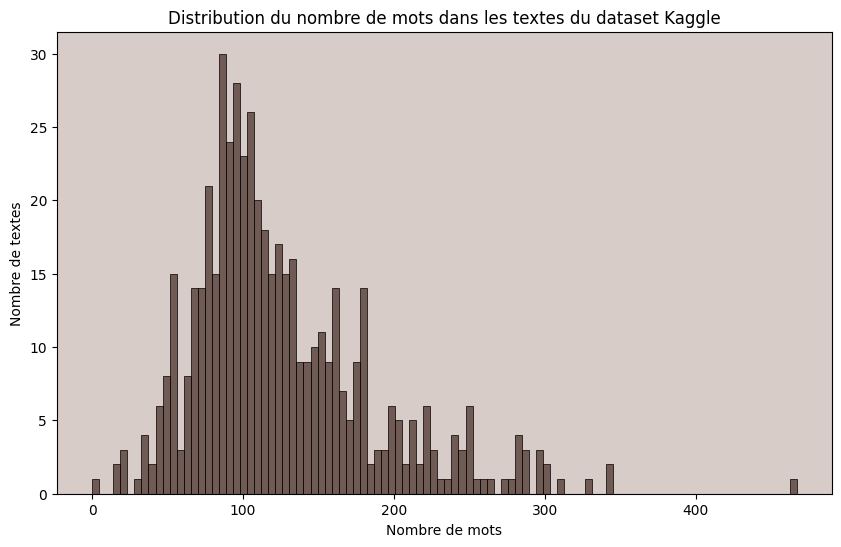

In [74]:
#ploting the number of words in the texts
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de textes')
sns.set_palette(palette_tabac)
sns.histplot(list(word_dict.values()), bins=100)
plt.title('Distribution du nombre de mots dans les textes du dataset Kaggle')
plt.show()

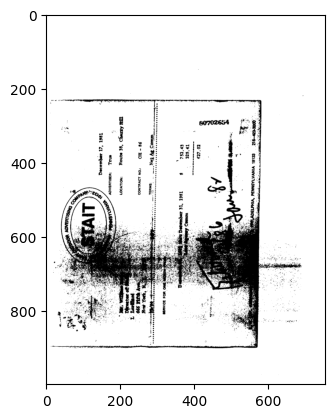

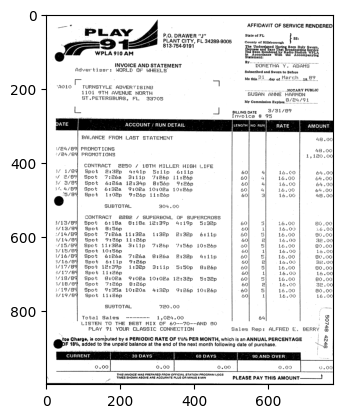

In [69]:
#show the picture with least and most words
min_words = min(word_dict, key=word_dict.get)
max_words = max(word_dict, key=word_dict.get)

img = Image.open(min_words.replace("_ocr.xml", ".tif"))
plt.imshow(img, cmap='gray')
plt.show()

img = Image.open(max_words.replace("_ocr.xml", ".tif"))
plt.imshow(img, cmap='gray')
plt.show()

In [80]:
#write a list of all unique words in the texts and count them
word_list = []
for text in text_dict.values():
    for word in text.split():
        word_list.append(word)

word_count = {}
for word in word_list:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

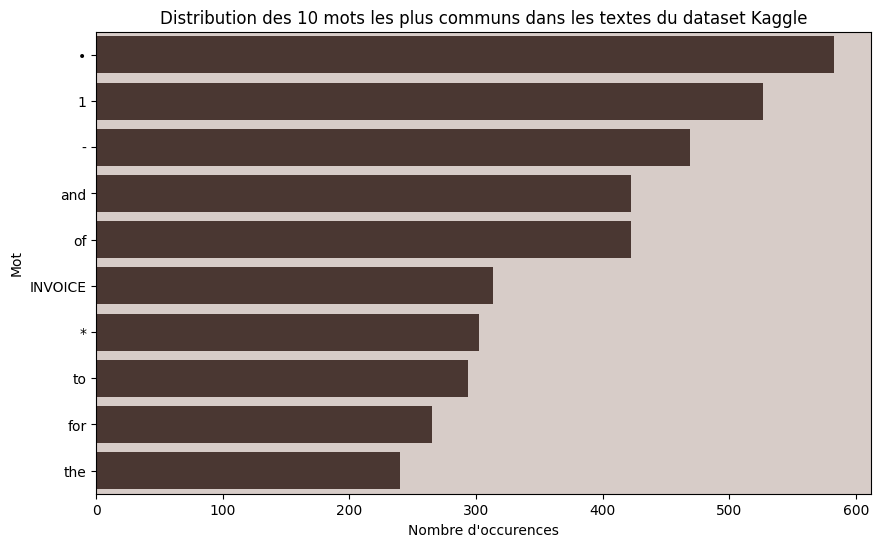

In [81]:
#ploting the number of occurences of the 10 most common words
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Nombre d\'occurences')
plt.ylabel('Mot')
sns.set_palette(palette_tabac)
sns.barplot(x=[x[1] for x in sorted_word_count[:10]], y=[x[0] for x in sorted_word_count[:10]])
plt.title('Distribution des 10 mots les plus communs dans les textes du dataset Kaggle')
plt.show()


Maintenant on fait la meme chose avec le dataset RVL-CDIP

In [112]:
#puting all the files name into a list
file_list = []
for file in picture_list:
    file_list.append(file.split('/')[-1])

#puting all the pictures into a list
picture_list = []
for file in glob.glob("./../data/raw/selected/*.tif"):
    picture_list.append(file)

#puting the content of the target files into a list
target_list = []
for file in glob.glob("./../data/raw/selected/*.txt"):
    with open(file, 'r') as f:
        target_list.append(f.read())

#stitching in a dataframe file name, picture and target
df = pd.DataFrame()
df['filename'] = file_list
df['picture'] = picture_list
df['target'] = target_list


selected\0000001531.tif


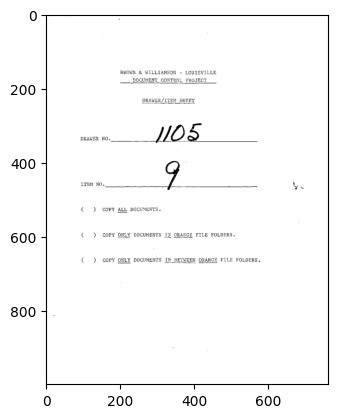

12


In [114]:
#first file, picture and target
print(df['filename'][0])

img = Image.open(df['picture'][0])
plt.imshow(img, cmap='gray')
plt.show()

print(df['target'][0])


Visualisation des propriétés des images

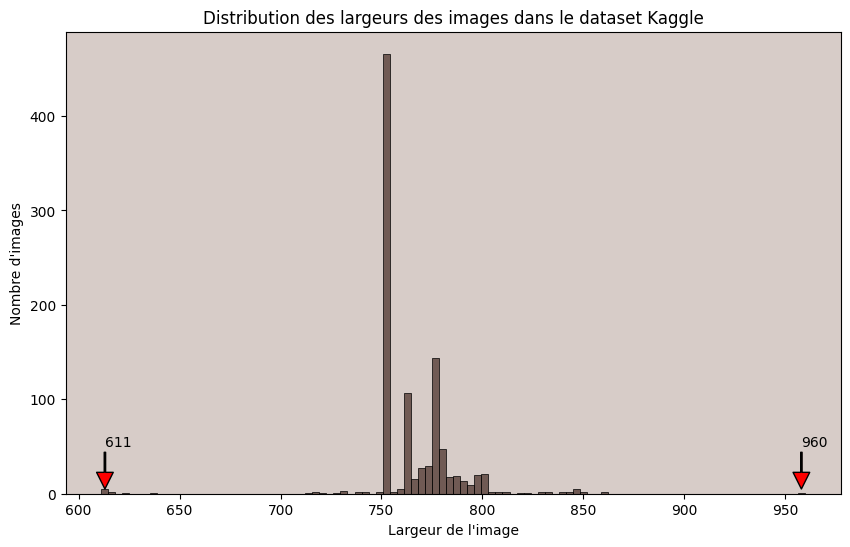

In [115]:
#copying the first dimension of each picture into an array. The second dimension is always 1000.
dim_list = []
for picture in df['picture']:
    img = Image.open(picture)
    dim_list.append(img.size[0])

#ploting the dimensions
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Largeur de l\'image')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot(dim_list, bins=100)
plt.annotate(min(dim_list), xy=(min(dim_list)+2, 5), xytext=(min(dim_list)+2, 50), arrowprops=dict(facecolor='red', width=1))
plt.annotate(max(dim_list), xy=(max(dim_list)-2, 5), xytext=(max(dim_list)-2, 50), arrowprops=dict(facecolor='red', width=1))
plt.title('Distribution des largeurs des images dans le dataset Kaggle')
plt.show()

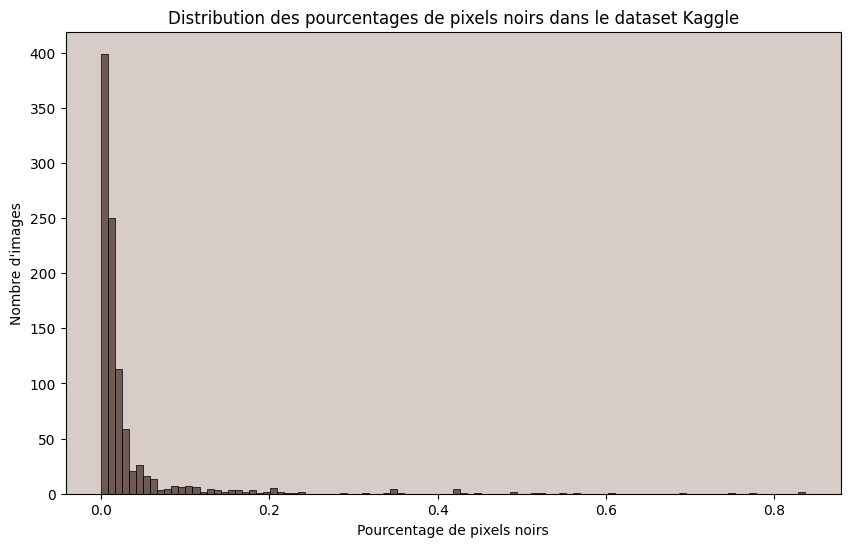

In [116]:
#ploting the black percent of the images
black_percent_list = []
for picture in df['picture']:
    black_percent_list.append(get_black_percent(picture))

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Pourcentage de pixels noirs')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot([x[1] for x in black_percent_list], bins=100)
plt.title('Distribution des pourcentages de pixels noirs dans le dataset Kaggle')
plt.show()

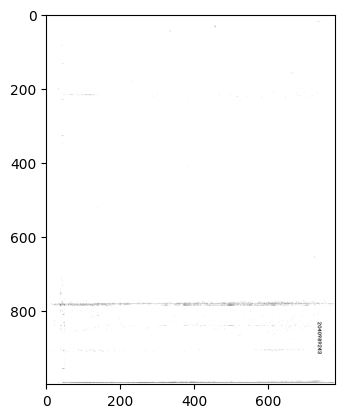

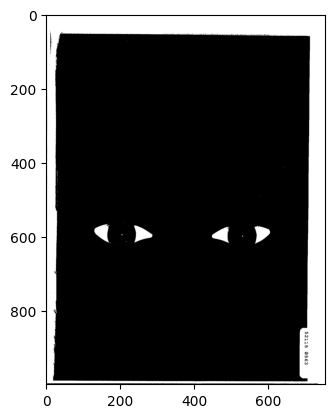

In [117]:
#showing the picture with least and most black pixels
min_black = min(black_percent_list, key=lambda x: x[1])
max_black = max(black_percent_list, key=lambda x: x[1])

img = Image.open(min_black[0])
plt.imshow(img, cmap='gray')
plt.show()

img = Image.open(max_black[0])
plt.imshow(img, cmap='gray')
plt.show()

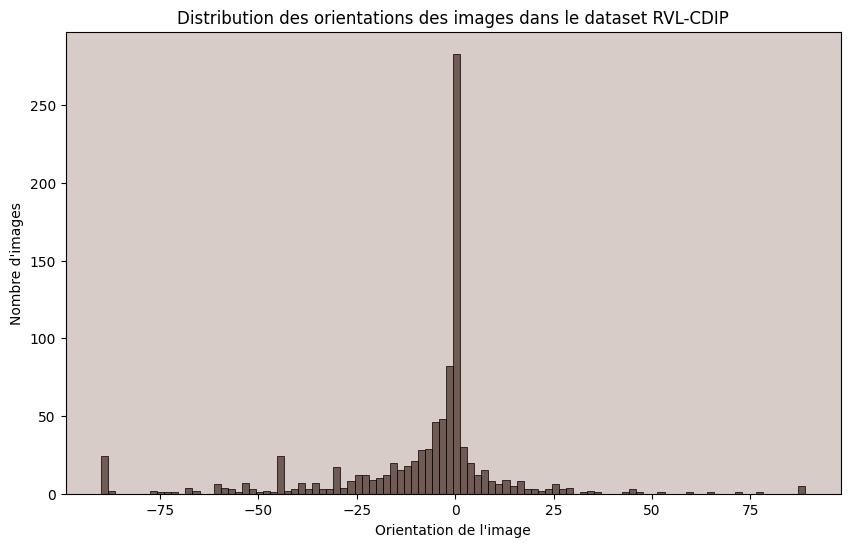

In [118]:
#get the global orientation of the pictures
orientation_list = []
for picture in df['picture']:
    orientation_list.append(get_orientation(picture))

#ploting the orientation of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Orientation de l\'image')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot(orientation_list, bins=100)
plt.title('Distribution des orientations des images dans le dataset RVL-CDIP')
plt.show()

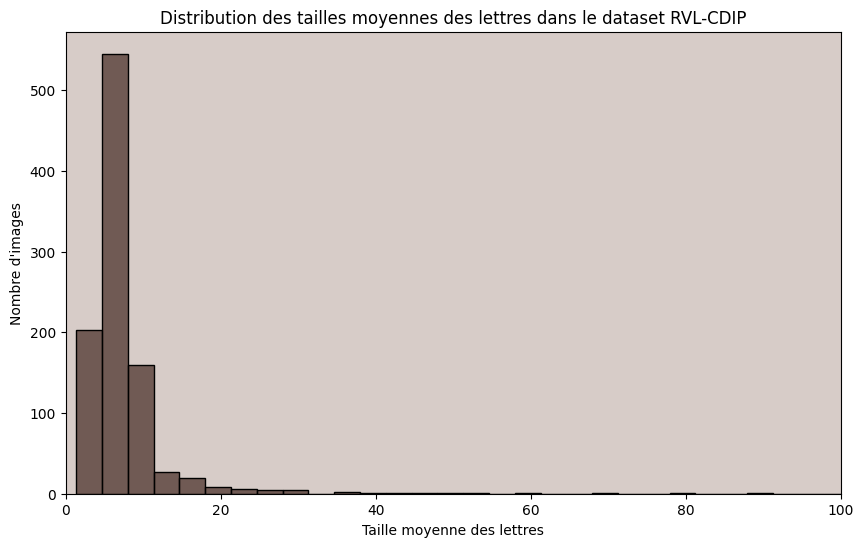

In [144]:
#get the average size of the letters in the pictures
letter_size_list = []
for picture in df['picture']:
    letter_size_list.append(get_letter_size(picture))

#ploting the letter size of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlim(0, 100)
plt.xlabel('Taille moyenne des lettres')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot(letter_size_list, bins=300)
plt.title('Distribution des tailles moyennes des lettres dans le dataset RVL-CDIP')
plt.show()

Passons aux propriétés de la target

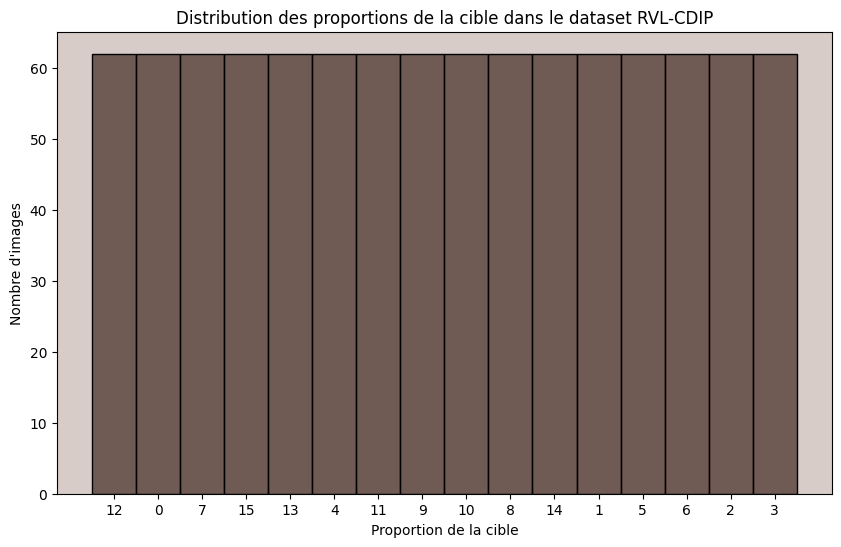

In [119]:
#ploting the proportions of target in an histogram
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette_tabac[-1])
plt.xlabel('Proportion de la cible')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette_tabac)
sns.histplot(df['target'], bins=100)
plt.title('Distribution des proportions de la cible dans le dataset RVL-CDIP')
plt.show()